# Players Analysis

In [2]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

In [4]:
player_df = pd.read_csv("Data\\IPL18Player.csv")

In [62]:
player_df.head()

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,bowling_dot_balls,bowling_sixes,no_balls,balls_bowled_1_to_6,runs_conceded_1_to_6,balls_bowled_7_to_14,runs_conceded_7_to_14,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,0,0,0,0,0,0,0,1
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,0,0,0,0,0,0,0,1
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,90,29,0,0,0,126,160,195,373,1
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,118,10,2,194,236,37,42,0,0,1
5,60234,F du Plessis,250000.0,Chennai Super Kings,6,5,1050,1026,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_id               149 non-null    int64  
 1   long_scorecard_name     149 non-null    object 
 2   Salary                  141 non-null    float64
 3   team                    149 non-null    object 
 4   matches                 149 non-null    int64  
 5   wins                    149 non-null    int64  
 6   team_runs_for           149 non-null    int64  
 7   team_runs_against       149 non-null    int64  
 8   matches_keeper          149 non-null    int64  
 9   byes_conceded           149 non-null    int64  
 10  moms                    149 non-null    int64  
 11  innings                 149 non-null    int64  
 12  not_outs                149 non-null    int64  
 13  runs                    149 non-null    int64  
 14  balls_faced             149 non-null    in

In [8]:
#some salaries not present so dropping them
player_df = player_df.dropna()

In [20]:
Top_sal = player_df.iloc[:,1:3].sort_values('Salary', ascending = False)[:10]

In [21]:
Top_sal

,long_scorecard_name,Salary
127,V Kohli,2656250.0
88,RG Sharma,2343750.0
36,RR Pant,2343750.0
14,MS Dhoni,2343750.0
93,BA Stokes,1953130.0
46,AR Patel,1953130.0
73,SP Narine,1953130.0
100,JD Unadkat,1796880.0
16,SK Raina,1718750.0
109,AB de Villiers,1718750.0


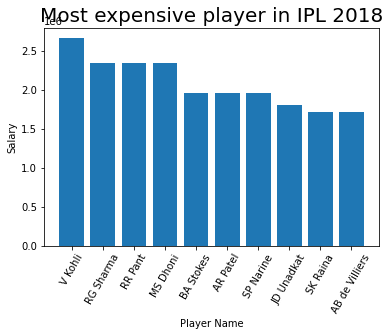

In [63]:
plt.bar(Top_sal['long_scorecard_name'], Top_sal['Salary'])
plt.xticks(rotation=60)
plt.xlabel('Player Name',size=10)
plt.ylabel('Salary',size=10)
plt.title('Most expensive player in IPL 2018',size=20)
plt.show()

### Create a variable to identify batsman and bowler

In [88]:
##adding a batsman/bowler columns to identify if that player is a batsman or not
player_df['batsman'] = np.where(player_df['innings'] > 0, 1, 0)

player_df['bowler'] = np.where(player_df['matches_bowled'] > 0, 1, 0)

In [89]:
player_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,1,1,0,14,40.133333,149.379653,0.000000,0.000000
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,1,1,0,1,4.000000,80.000000,0.000000,0.000000
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,195,373,1,1,1,4,28.200000,153.260870,35.533333,21.400000
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,0,0,1,1,1,3,12.500000,166.666667,25.272727,20.818182
5,60234,F du Plessis,250000.0,Chennai Super Kings,6,5,1050,1026,0,0,...,0,0,1,1,0,5,27.000000,124.615385,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,42,49,0,1,1,2,0.000000,0.000000,25.615385,20.307692
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,42,77,0,1,1,11,19.916667,120.707071,30.400000,22.800000
146,167996,SP Goswami,156250.0,Sunrisers,6,1,1063,1079,6,1,...,0,0,0,1,0,3,13.000000,126.829268,0.000000,0.000000
147,152985,WP Saha,781250.0,Sunrisers,11,9,1658,1595,11,1,...,0,0,0,1,0,8,13.555556,118.446602,0.000000,0.000000


### Goal to make balanced team having good player, hitters, economic bowler and wicket takers

#### Performance measures for both batsmen and bowlers
batting average = runs / the numbers of outs
batting strike rate = (runs * 100) / balls faced
bowling average = runs conceded / wicket taken
bowling strike rate = number of balls bowled / wicket taken

Note - here if any denominator is zero, value will be infinite. To handle this we can add 1 to each

In [68]:
player_df['outs'] = np.where(player_df['batsman']==1, player_df['innings'] - player_df['not_outs'], 0)

In [71]:
## adding all the metrics to the dataframe
player_df['batting_average'] = player_df['runs'] / (player_df['outs']+1)
player_df['batting_strike'] = player_df['runs'] / ((player_df['balls_faced']+1))*100
player_df['bowling_average'] = player_df['runs_conceded'] / (player_df['wickets']+1)
player_df['bowling_strike'] = player_df['balls_bowled'] / (player_df['wickets']+1)

In [80]:
player_df.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,141.0,444751.432624,549625.645749,7121.0,74266.000000,180612.000000,452594.000000,2140473.0
Salary,141.0,620200.709220,591727.013929,15000.0,156250.000000,437500.000000,968750.000000,2656250.0
matches,141.0,9.106383,5.050746,1.0,5.000000,9.000000,14.000000,17.0
wins,141.0,4.539007,3.085722,0.0,2.000000,4.000000,6.000000,11.0
team_runs_for,141.0,1509.205674,847.422289,128.0,839.000000,1508.000000,2322.000000,2809.0
team_runs_against,141.0,1510.184397,835.065469,127.0,841.000000,1493.000000,2282.000000,2750.0
matches_keeper,141.0,0.836879,3.192903,0.0,0.000000,0.000000,0.000000,16.0
byes_conceded,141.0,0.475177,2.099597,0.0,0.000000,0.000000,0.000000,13.0
moms,141.0,0.425532,0.812703,0.0,0.000000,0.000000,1.000000,4.0
innings,141.0,6.482270,5.109659,0.0,2.000000,5.000000,11.000000,17.0


## Segregating Batsman and bowlers

In [90]:
player_df['batsman'].unique()

array([1, 0])

In [91]:
## batsmen
bat_df = player_df[player_df['batsman'] == 1]
bat_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
0,8931,AT Rayudu,343750.0,Chennai Super Kings,16,11,2809,2750,0,0,...,0,0,1,1,0,14,40.133333,149.379653,0.000000,0.000000
1,254771,D Shorey,31250.0,Chennai Super Kings,1,1,128,127,0,0,...,0,0,1,1,0,1,4.000000,80.000000,0.000000,0.000000
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,195,373,1,1,1,4,28.200000,153.260870,35.533333,21.400000
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,0,0,1,1,1,3,12.500000,166.666667,25.272727,20.818182
5,60234,F du Plessis,250000.0,Chennai Super Kings,6,5,1050,1026,0,0,...,0,0,1,1,0,5,27.000000,124.615385,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,42,49,0,1,1,2,0.000000,0.000000,25.615385,20.307692
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,42,77,0,1,1,11,19.916667,120.707071,30.400000,22.800000
146,167996,SP Goswami,156250.0,Sunrisers,6,1,1063,1079,6,1,...,0,0,0,1,0,3,13.000000,126.829268,0.000000,0.000000
147,152985,WP Saha,781250.0,Sunrisers,11,9,1658,1595,11,1,...,0,0,0,1,0,8,13.555556,118.446602,0.000000,0.000000


In [92]:
## bowlers
bowl_df = player_df[player_df['bowler'] == 1]
bowl_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
2,44613,DJ Bravo,1000000.0,Chennai Super Kings,16,11,2809,2750,0,0,...,195,373,1,1,1,4,28.200000,153.260870,35.533333,21.400000
4,258155,DL Chahar,125000.0,Chennai Super Kings,12,9,2117,2068,0,0,...,0,0,1,1,1,3,12.500000,166.666667,25.272727,20.818182
6,7121,Harbhajan Singh,312500.0,Chennai Super Kings,13,8,2242,2254,0,0,...,0,0,1,1,1,3,7.250000,78.378378,33.750000,23.875000
7,19120,Imran Tahir,156250.0,Chennai Super Kings,6,4,1147,1079,0,0,...,40,36,1,1,1,0,2.000000,66.666667,26.857143,17.714286
8,1222291,KM Asif,62500.0,Chennai Super Kings,2,1,388,378,0,0,...,12,39,1,0,1,0,0.000000,0.000000,18.750000,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1738090,Rashid Khan,1406250.0,Sunrisers,17,10,2721,2674,0,0,...,132,163,0,1,1,5,9.833333,184.375000,20.818182,18.545455
143,230422,S Kaul,593750.0,Sunrisers,17,10,2721,2674,0,0,...,187,236,0,1,1,3,0.750000,20.000000,24.818182,18.000000
144,250486,S Sharma,468750.0,Sunrisers,12,7,1925,1876,0,0,...,42,49,0,1,1,2,0.000000,0.000000,25.615385,20.307692
145,73152,Shakib Al Hasan,312500.0,Sunrisers,17,10,2721,2674,0,0,...,42,77,0,1,1,11,19.916667,120.707071,30.400000,22.800000


## Consistent batsman having good avg

In [ ]:
con_bat = bat_df[bat_df["batting_average"] > 30]
con_bat = con_bat.sort_values("batting_average", ascending =False )
con_bat

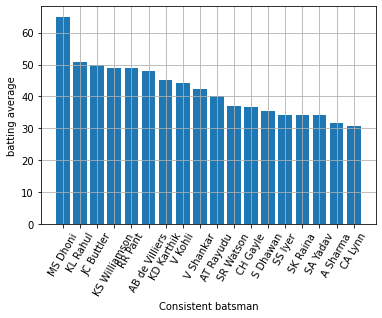

In [102]:
plt.bar(con_bat['long_scorecard_name'], con_bat['batting_average'])
plt.grid()
plt.xticks(rotation=60)
plt.xlabel('Consistent batsman',size=10)
plt.ylabel('batting average',size=10)
plt.show()

## Hard Hitters

In [104]:
hit_df = bat_df[bat_df['batting_strike'] > 170].sort_values('batting_strike', ascending=False)

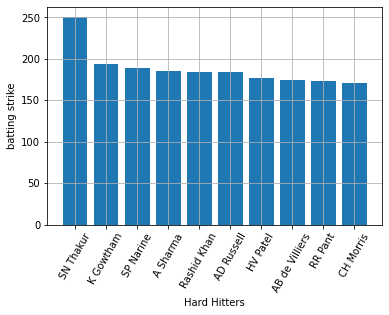

In [105]:
plt.bar(hit_df['long_scorecard_name'], hit_df['batting_strike'])
plt.grid()
plt.xticks(rotation=60)
plt.xlabel('Hard Hitters',size=10)
plt.ylabel('batting strike',size=10)
plt.show()

## Combination of both

In [107]:
com_df = bat_df[(player_df['batting_average'] > 30) & (player_df['batting_strike'] > 170)]
com_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
21,1576635,A Sharma,85940.0,Delhi Daredevils,3,2,517,478,0,0,...,0,0,0,1,0,1,31.500000,185.294118,0.0,0.0
36,1065017,RR Pant,2343750.0,Delhi Daredevils,14,5,2343,2387,14,6,...,0,0,0,1,0,13,48.857143,173.164557,0.0,0.0
109,45848,AB de Villiers,1718750.0,Royal Challengers Bangalore,12,5,1980,2054,0,0,...,0,0,0,1,0,9,48.000000,173.913043,0.0,0.0


## Economic bowlers

In [108]:
player_df['bowling_average'].describe()

count    141.000000
mean      17.493864
std       16.108488
min        0.000000
25%        0.000000
50%       20.052632
75%       27.466667
max       72.000000
Name: bowling_average, dtype: float64

In [123]:
eco_bow = bowl_df[bowl_df["bowling_average"] < 15].sort_values("bowling_average", ascending = True)
eco_bow

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,0,1,1,9,26.000000,129.353234,7.000000,6.0
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,6,11,0,1,1,13,21.714286,130.472103,8.800000,7.4
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,6,3,0,1,1,7,14.375000,115.000000,9.500000,9.0
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,0,1,1,3,11.750000,104.444444,10.000000,6.0
91,255490,AN Sharma,31250.0,Rajasthan Royals,1,1,177,176,0,0,...,0,0,0,0,1,0,0.000000,0.000000,11.000000,6.0
11,1214926,LT Ngidi,78130.0,Chennai Super Kings,7,5,1124,1137,0,0,...,60,68,1,0,1,0,0.000000,0.000000,13.000000,13.0
115,264084,M Ashwin,343750.0,Royal Challengers Bangalore,2,0,302,304,0,0,...,12,19,0,1,1,1,0.500000,33.333333,13.250000,10.5
37,1979200,S Lamichhane,31250.0,Delhi Daredevils,3,2,517,478,0,0,...,12,15,0,0,1,0,0.000000,0.000000,13.666667,12.0


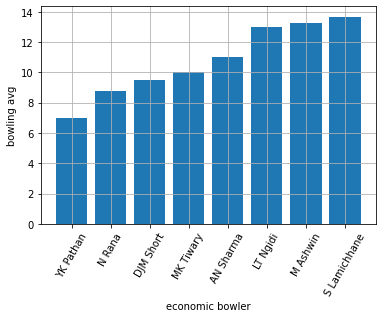

In [125]:
plt.bar(eco_bow["long_scorecard_name"], eco_bow["bowling_average"])
plt.grid()
plt.xticks(rotation=60)
plt.xlabel('economic bowler',size=10)
plt.ylabel('bowling avg',size=10)
plt.show()

## Wicket Takers

In [127]:
wic_tak = bowl_df[bowl_df['bowling_strike'] < 10].sort_values("bowling_strike")
wic_tak

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,0,1,1,3,11.750000,104.444444,10.000000,6.000000
91,255490,AN Sharma,31250.0,Rajasthan Royals,1,1,177,176,0,0,...,0,0,0,0,1,0,0.000000,0.000000,11.000000,6.000000
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,0,1,1,9,26.000000,129.353234,7.000000,6.000000
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,6,11,0,1,1,13,21.714286,130.472103,8.800000,7.400000
68,10424,R Vinay Kumar,156250.0,Kolkata Knight Riders,2,1,379,381,0,0,...,12,35,0,1,1,0,6.000000,150.000000,21.666667,7.666667
8,1222291,KM Asif,62500.0,Chennai Super Kings,2,1,388,378,0,0,...,12,39,1,0,1,0,0.000000,0.000000,18.750000,9.000000
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,6,3,0,1,1,7,14.375000,115.000000,9.500000,9.000000


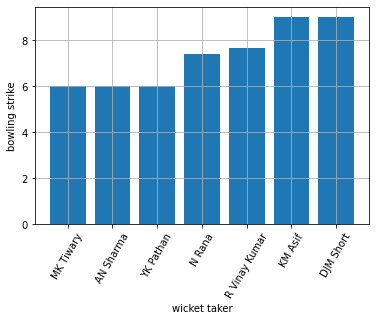

In [128]:
plt.bar(wic_tak["long_scorecard_name"], wic_tak['bowling_strike'])
plt.grid()
plt.xticks(rotation=60)
plt.xlabel('wicket taker',size=10)
plt.ylabel('bowling strike',size=10)
plt.show()

## Combination of both

In [130]:
comb_df = bowl_df[(bowl_df["bowling_average"] < 15) & (bowl_df['bowling_strike'] < 10)]
comb_df

,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
54,62509,MK Tiwary,156250.0,Kings XI Punjab,5,1,753,787,0,0,...,0,0,0,1,1,3,11.750000,104.444444,10.0,6.0
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,6,11,0,1,1,13,21.714286,130.472103,8.8,7.4
91,255490,AN Sharma,31250.0,Rajasthan Royals,1,1,177,176,0,0,...,0,0,0,0,1,0,0.000000,0.000000,11.0,6.0
94,158650,DJM Short,625000.0,Rajasthan Royals,7,3,1124,1067,0,0,...,6,3,0,1,1,7,14.375000,115.000000,9.5,9.0
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,0,1,1,9,26.000000,129.353234,7.0,6.0


## All Rounders

In [136]:
alrs = player_df[(player_df['batting_average'] > 15) & (player_df['bowling_average'] < 25) & (player_df['bowling_average'] > 1)]
alrs


,player_id,long_scorecard_name,Salary,team,matches,wins,team_runs_for,team_runs_against,matches_keeper,byes_conceded,...,balls_bowled_15_to_20,runs_conceded_15_to_20,event_winner,batsman,bowler,outs,batting_average,batting_strike,bowling_average,bowling_strike
29,250417,HV Patel,31250.0,Delhi Daredevils,5,2,878,845,0,0,...,27,39,0,1,1,1,30.000000,176.470588,20.875000,13.125000
65,412485,N Rana,531250.0,Kolkata Knight Riders,15,8,2579,2566,0,0,...,6,11,0,1,1,13,21.714286,130.472103,8.800000,7.400000
77,392753,HH Pandya,1718750.0,Mumbai Indians,13,6,2233,2131,0,0,...,76,120,0,1,1,9,26.000000,132.653061,20.052632,13.473684
82,254356,KH Pandya,1375000.0,Mumbai Indians,14,6,2380,2282,0,0,...,31,34,0,1,1,10,20.727273,144.303797,21.846154,18.538462
119,46081,MM Ali,265630.0,Royal Challengers Bangalore,5,3,772,783,0,0,...,7,10,0,1,1,4,15.400000,163.829787,24.250000,19.750000
134,302557,CR Brathwaite,312500.0,Sunrisers,4,1,663,654,0,0,...,25,40,0,1,1,3,18.750000,153.061224,15.666667,10.166667
135,1058801,D Hooda,562500.0,Sunrisers,9,4,1508,1524,0,0,...,0,0,0,1,1,4,17.400000,106.097561,24.000000,18.000000
148,15222,YK Pathan,296880.0,Sunrisers,15,10,2338,2276,0,0,...,0,0,0,1,1,9,26.000000,129.353234,7.000000,6.000000


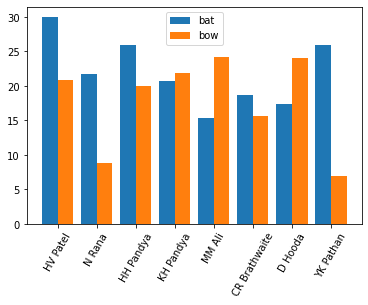

In [159]:
x_axis = np.arange(0,8)
plt.bar(x_axis-0.2,alrs['batting_average'], width=0.4, label = "bat")
plt.bar(x_axis+0.2,alrs['bowling_average'], width = 0.4, label = "bow")
plt.xticks(x_axis,alrs['long_scorecard_name'])
plt.xticks(rotation=60)
plt.legend()
plt.show()